In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from build_data import load_data

In [23]:
df = load_data(start_year=1850, end_year=2020)

Time Taken: 0.08829854198847897


In [24]:
df[~df['monthly_average_co2'].isnull()].sort_values('year',)

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
1298,1958,3,5.605,6_Tokyo,Japan,36.17,139.23,13.173,13.880,315.71,NaN,2.0,2.0
11566,1958,11,6.254,7_London,Britain,52.24,-0.00,13.284,13.872,313.33,NaN,2.0,2.0
11565,1958,10,10.687,7_London,Britain,52.24,-0.00,14.299,14.807,312.42,NaN,2.0,2.0
11564,1958,9,15.273,7_London,Britain,52.24,-0.00,15.073,15.654,313.21,NaN,2.0,2.0
11563,1958,8,16.416,7_London,Britain,52.24,-0.00,15.715,16.257,314.93,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26582,2020,3,22.485,3_Riyadh,Saudi Arabia,24.92,46.11,14.236,14.915,414.72,7.821272e+09,4.0,1.0
26581,2020,2,18.088,3_Riyadh,Saudi Arabia,24.92,46.11,13.669,14.373,414.32,7.821272e+09,4.0,1.0
26580,2020,1,14.217,3_Riyadh,Saudi Arabia,24.92,46.11,13.433,14.086,413.59,7.821272e+09,4.0,1.0
24538,2020,11,22.982,10_Pretoria,South Africa,-24.92,28.37,14.323,14.716,413.10,7.821272e+09,4.0,1.0


In [25]:
df[~df['population'].isnull()].sort_values('year',)

,year,month,Actual Temperature,City,Country,Latitude,Longitude,Actual Temperature_Air_Global,Actual Temperature_Water_Global,monthly_average_co2,population,year_average_VEI,year_events_amount
1320,1960,1,1.310,6_Tokyo,Japan,36.17,139.23,12.219,12.879,316.43,3.031517e+09,3.0,1.0
32019,1960,4,18.013,19_Sydney,Australia,-34.56,151.78,13.838,14.537,319.03,3.031517e+09,3.0,1.0
32018,1960,3,18.917,19_Sydney,Australia,-34.56,151.78,12.722,13.469,317.58,3.031517e+09,3.0,1.0
32017,1960,2,19.548,19_Sydney,Australia,-34.56,151.78,12.544,13.298,316.98,3.031517e+09,3.0,1.0
32016,1960,1,20.922,19_Sydney,Australia,-34.56,151.78,12.219,12.879,316.43,3.031517e+09,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26582,2020,3,22.485,3_Riyadh,Saudi Arabia,24.92,46.11,14.236,14.915,414.72,7.821272e+09,4.0,1.0
26581,2020,2,18.088,3_Riyadh,Saudi Arabia,24.92,46.11,13.669,14.373,414.32,7.821272e+09,4.0,1.0
26580,2020,1,14.217,3_Riyadh,Saudi Arabia,24.92,46.11,13.433,14.086,413.59,7.821272e+09,4.0,1.0
24538,2020,11,22.982,10_Pretoria,South Africa,-24.92,28.37,14.323,14.716,413.10,7.821272e+09,4.0,1.0


In [26]:
df['shift'] = df.groupby(["Country"])['Actual Temperature'].shift()
df["change_in_temp"] = df['Actual Temperature'] - df['shift']

In [46]:
df_ = df.groupby(["year","City"])['change_in_temp'].apply(lambda c: c.abs().sum()).reset_index()

In [47]:
df_

,year,City,change_in_temp
0,1850,11_Marrakesh,37.235
1,1850,12_Anchorage,94.176
2,1850,13_SanDiego,30.466
3,1850,14_NewYork,48.120
4,1850,15_Paris,38.186
...,...,...,...
3408,2020,5_Athens,32.855
3409,2020,6_Tokyo,47.842
3410,2020,7_London,26.305
3411,2020,8_Reykjavík,24.917


In [50]:
pivot_df = df_.pivot(index='year', columns='City', values='change_in_temp').reset_index()

In [51]:
pivot_df

City,year,10_Pretoria,11_Marrakesh,12_Anchorage,13_SanDiego,14_NewYork,15_Paris,16_Rome,17_Barcelona,18_Helsinki,...,1_Peking,20_Brasília,2_NewDelhi,3_Riyadh,4_Moscow,5_Athens,6_Tokyo,7_London,8_Reykjavík,9_Lhasa
0,1850,NaN,37.235,94.176,30.466,48.120,38.186,37.680,29.849,49.587,...,61.636,0.000,38.093,44.559,61.246,34.705,45.305,33.611,26.097,45.151
1,1851,NaN,35.758,59.736,19.542,50.279,33.660,36.783,29.673,47.560,...,62.418,8.362,41.512,43.608,60.998,33.563,48.668,29.529,22.838,34.401
2,1852,NaN,34.730,59.616,18.939,50.075,35.430,35.744,28.355,53.925,...,64.578,7.192,38.350,43.726,59.143,30.419,50.498,28.364,34.014,38.554
3,1853,NaN,36.491,44.587,17.937,52.400,43.686,41.516,36.174,49.985,...,69.580,9.552,42.677,46.101,55.365,32.179,51.113,38.760,31.589,43.783
4,1854,NaN,38.533,58.744,20.106,55.554,33.845,40.213,28.737,52.649,...,66.560,10.072,38.481,43.748,61.463,35.773,45.903,28.239,32.462,38.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2016,26.006,36.607,55.088,18.754,58.480,35.096,37.213,26.421,56.911,...,63.881,11.435,38.125,43.440,67.296,35.985,47.197,30.599,24.605,36.739
167,2017,19.580,42.789,58.299,13.594,48.214,36.281,46.434,33.342,35.996,...,60.921,16.389,38.814,49.740,48.638,34.493,50.019,30.569,32.470,36.718
168,2018,24.841,35.269,56.531,18.687,52.158,44.534,43.013,36.476,58.837,...,66.798,10.545,41.856,43.330,65.003,34.119,49.700,35.037,23.929,37.218
169,2019,23.903,39.297,58.395,23.181,55.199,34.843,40.646,30.400,41.071,...,59.841,10.917,43.962,40.231,45.690,32.870,49.127,31.099,28.841,41.697


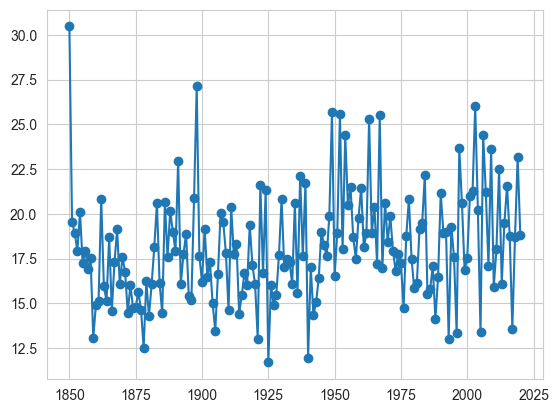

In [53]:
plt.plot(pivot_df.year, pivot_df["13_SanDiego"], marker='o', label=str("City"))

In [28]:
df.groupby("Country").change_in_temp.apply(lambda c: c.abs().sum())

Country
Australia        2425.014
Brazil           1751.814
Britain          5260.716
China           17269.751
Finland          8653.718
France           6092.236
Greece           5860.587
Iceland          5403.719
India            6473.388
Italy            6731.019
Japan            8371.799
Morocco          6450.987
Russia          10396.273
Saudi Arabia     7534.926
South Africa     4009.808
Spain            5137.650
USA             22647.328
Name: change_in_temp, dtype: float64

In [38]:
df_chng_temp = df.groupby("City").change_in_temp.apply(lambda c: c.abs().sum()).reset_index().sort_values(["change_in_temp"], ascending=False).reset_index(drop=True)

In [42]:
df_chng_temp

,City,change_in_temp
0,1_Peking,10808.960
1,4_Moscow,10396.273
2,12_Anchorage,10382.171
3,14_NewYork,9167.028
4,18_Helsinki,8653.718
5,6_Tokyo,8371.799
6,3_Riyadh,7534.926
7,16_Rome,6731.019
8,2_NewDelhi,6473.388
9,9_Lhasa,6460.791


/var/folders/_x/nhk4mtw177l387qxf2hzf_600000gn/T/ipykernel_22009/2115876266.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="City", y="change_in_temp", hue="change_in_temp",


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1_Peking'),
  Text(1, 0, '4_Moscow'),
  Text(2, 0, '12_Anchorage'),
  Text(3, 0, '14_NewYork'),
  Text(4, 0, '18_Helsinki'),
  Text(5, 0, '6_Tokyo'),
  Text(6, 0, '3_Riyadh'),
  Text(7, 0, '16_Rome'),
  Text(8, 0, '2_NewDelhi'),
  Text(9, 0, '9_Lhasa'),
  Text(10, 0, '11_Marrakesh'),
  Text(11, 0, '15_Paris'),
  Text(12, 0, '5_Athens'),
  Text(13, 0, '8_Reykjavík'),
  Text(14, 0, '7_London'),
  Text(15, 0, '17_Barcelona'),
  Text(16, 0, '10_Pretoria'),
  Text(17, 0, '13_SanDiego'),
  Text(18, 0, '19_Sydney'),
  Text(19, 0, '20_Brasília')])

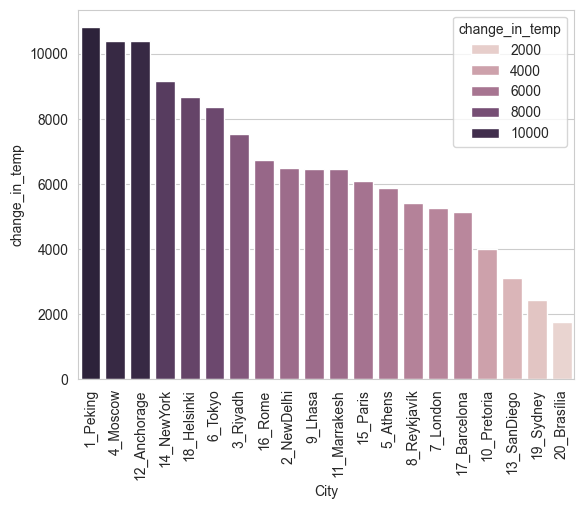

In [41]:
import seaborn as sns
sns.barplot(x="City", y="change_in_temp", hue="change_in_temp", 
                  data=df_chng_temp, ci=None)
plt.xticks(rotation=90)

In [11]:
df.rename(columns = {'Actual Temperature': 'Actual_Temperature'}, inplace = True)

In [13]:
df[df['year'].isin([1850,2020])].groupby(['City','month']).Actual_Temperature.apply(lambda c: c.diff(1))

City         month       
10_Pretoria  1      24528      NaN
             2      24529      NaN
             3      24530      NaN
             4      24531      NaN
             5      24532      NaN
                             ...  
9_Lhasa      10     16413    3.127
             11     14374      NaN
                    16414    1.286
             12     14375      NaN
                    16415    0.658
Name: Actual_Temperature, Length: 468, dtype: float64